51
100
105
256


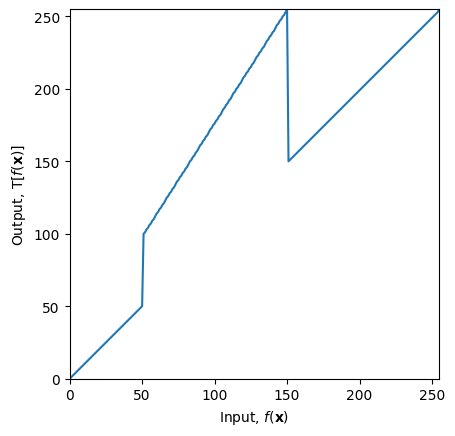

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(50, 50), (50, 100), (150, 255), (150, 150)])

t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
print(len(t1))
t2 = np.linspace(c[1,1], c[2,1], c[2,0] - c[1,0]).astype('uint8')
print(len(t2))
t3 = np.linspace(c[3,1], 255, 255 - c[3,0]).astype('uint8')
print(len(t3))

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.show()

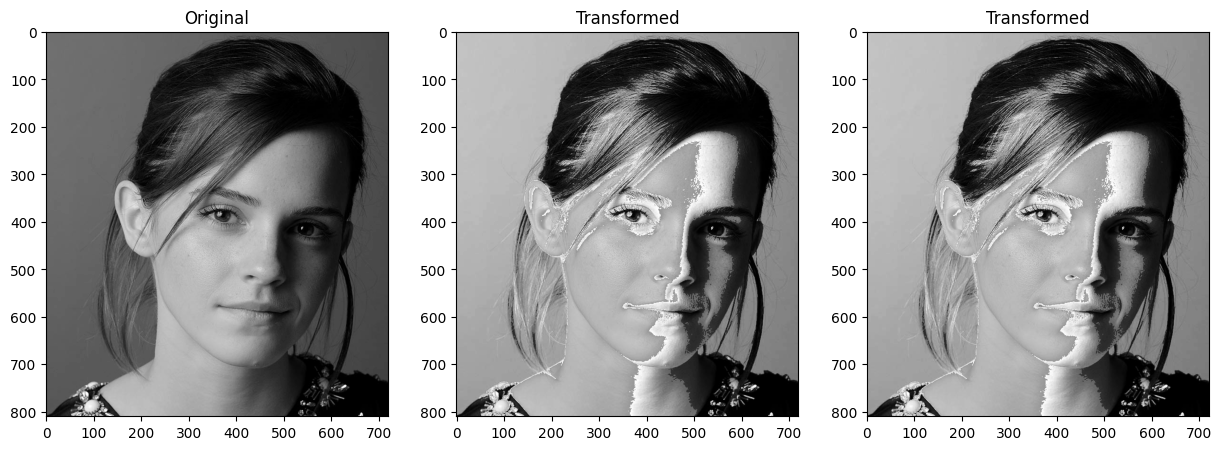

In [11]:
img_orig = cv.imread('emma.jpg', cv.IMREAD_GRAYSCALE)

f = img_orig.copy()
img_trans = cv.LUT(f, transform)
img_trans2 = transform[f]

fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0].imshow(img_orig, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(img_trans, cmap='gray', vmin=0, vmax=255)
ax[2].imshow(img_trans2, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[1].set_title('Transformed')
ax[2].set_title('Transformed')
plt.show()

201
55
256
[  0   0   0   0 200 201]
201
55
256
[197 198 199 200   0   0]


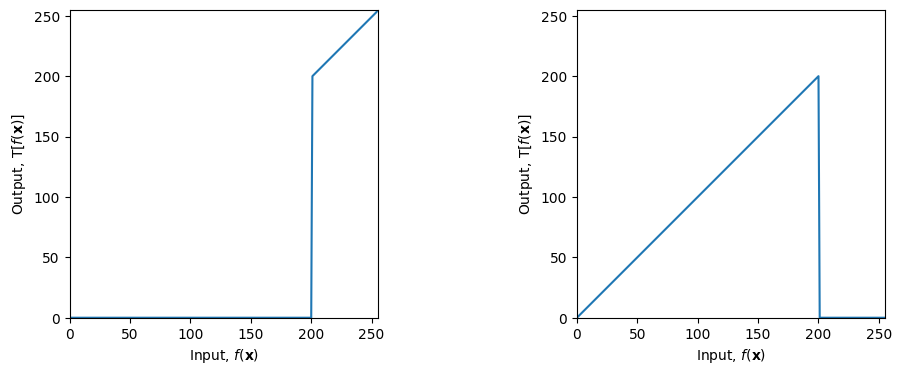

In [37]:
threshold = 200

t1 = np.linspace(0, 0, threshold+1).astype('uint8')
print(len(t1))
t2 = np.linspace(threshold, 255, 255-threshold).astype('uint8')
print(len(t2))

transform_white = np.concatenate((t1, t2), axis=0).astype('uint8')
print(len(transform_white))

print(transform_white[threshold-3:threshold+3])

t1 = np.linspace(0, threshold, threshold+1).astype('uint8')
print(len(t1))
t2 = np.linspace(0, 0, 255-threshold).astype('uint8')
print(len(t2))

transform_gray = np.concatenate((t1, t2), axis=0).astype('uint8')
print(len(transform_gray))

print(transform_gray[threshold-3:threshold+3])

fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(transform_white)
ax[1].plot(transform_gray)
ax[0].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[0].set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[1].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[1].set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[0].set_xlim(0,255)
ax[0].set_ylim(0,255)
ax[0].set_aspect('equal')
ax[1].set_xlim(0,255)
ax[1].set_ylim(0,255)
ax[1].set_aspect('equal')
plt.show()

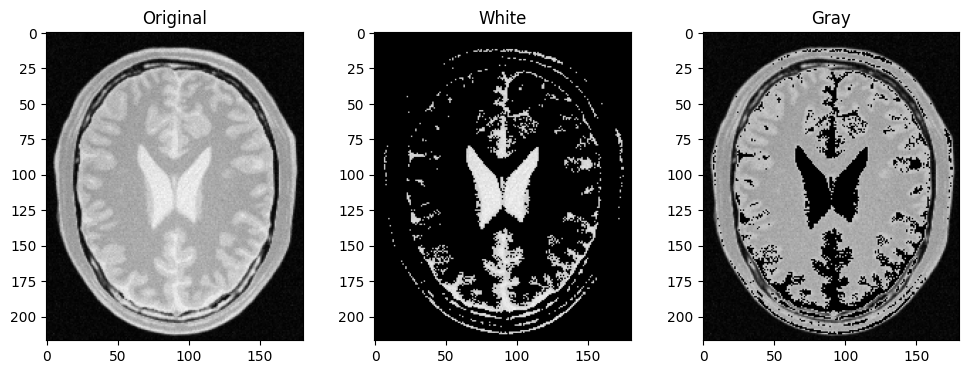

In [38]:
img = cv.imread('brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)

white_img = cv.LUT(img, transform_white)
gray_img = cv.LUT(img, transform_gray)

fig, ax = plt.subplots(1,3, figsize=(12,4))
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(white_img, cmap='gray', vmin=0, vmax=255)
ax[2].imshow(gray_img, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[1].set_title('White')
ax[2].set_title('Gray')
plt.show()


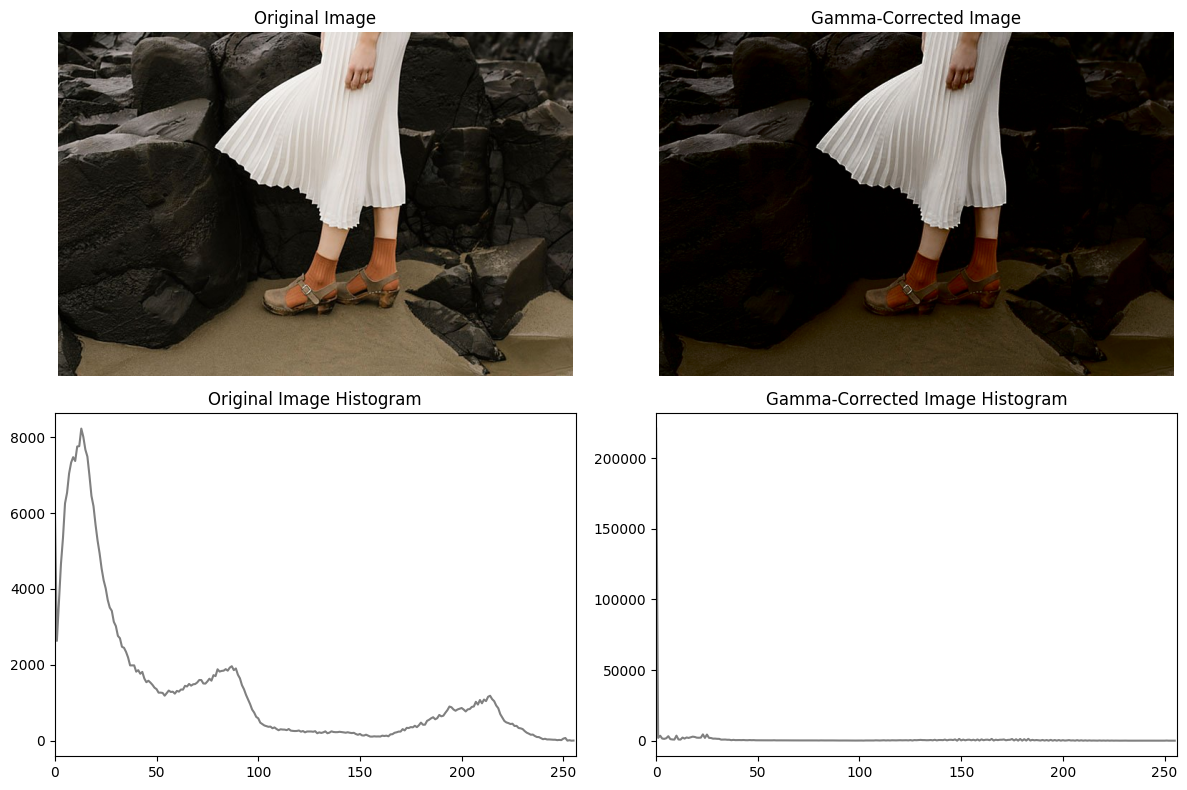

In [41]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the original image
image_path = 'highlights_and_shadows.jpg'  # Replace with your image path
f = cv.imread(image_path)

# Step 2: Convert the image to L*a*b* color space
image_lab = cv.cvtColor(f, cv.COLOR_BGR2Lab)

# Extract the L channel
L = image_lab[:, :, 0]

# Step 3: Define gamma value and create the LUT
gamma = 2.2  # Example gamma value
t = np.array([(i / 255.0) ** gamma * 255 for i in np.arange(0, 256)]).astype(np.uint8)

# Apply the LUT to the L channel
L_corrected = cv.LUT(L, t)

# Step 4: Combine the corrected L channel with the original a* and b* channels
image_lab[:, :, 0] = L_corrected  # Update the L channel
corrected_image = cv.cvtColor(image_lab, cv.COLOR_Lab2BGR)  # Convert back to RGB

# Step 5: Calculate histograms for original and corrected images
original_hist = cv.calcHist([f], [0], None, [256], [0, 256])  # Original image histogram
corrected_hist = cv.calcHist([corrected_image], [0], None, [256], [0, 256])  # Corrected image histogram

# Plotting images and histograms
plt.figure(figsize=(12, 8))

# Plot original image
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(f, cv.COLOR_BGR2RGB))  # Convert BGR to RGB for plotting
plt.axis('off')  # Hide axis

# Plot corrected image
plt.subplot(2, 2, 2)
plt.title('Gamma-Corrected Image')
plt.imshow(cv.cvtColor(corrected_image, cv.COLOR_BGR2RGB))  # Convert BGR to RGB for plotting
plt.axis('off')  # Hide axis

# Plot original histogram
plt.subplot(2, 2, 3)
plt.title('Original Image Histogram')
plt.plot(original_hist, color='gray')
plt.xlim([0, 256])

# Plot corrected histogram
plt.subplot(2, 2, 4)
plt.title('Gamma-Corrected Image Histogram')
plt.plot(corrected_hist, color='gray')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

